In [9]:
## Import of libraries

# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Profiling
from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


# For reproducibility purposes, define SEED for random_state. 
sns.set_palette("colorblind")
RANDOM_STATE = 42

/Users/xochitl.cedillo/conda_envs/dsa-engine-health/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
engine_df = pd.read_csv("../data/raw/engine_data.csv")
engine_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [4]:
engine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [5]:
engine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,195.527912
Engine Condition,19535.0,0.630509,0.482679,0.000000,0.000000,1.000000,1.000000,1.000000


In [6]:
engine_df["Engine Condition"].value_counts()

Engine Condition
1    12317
0     7218
Name: count, dtype: int64

Anotations:
- No null values, so amputations are not required

### 2. Check distribution

/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/pyth

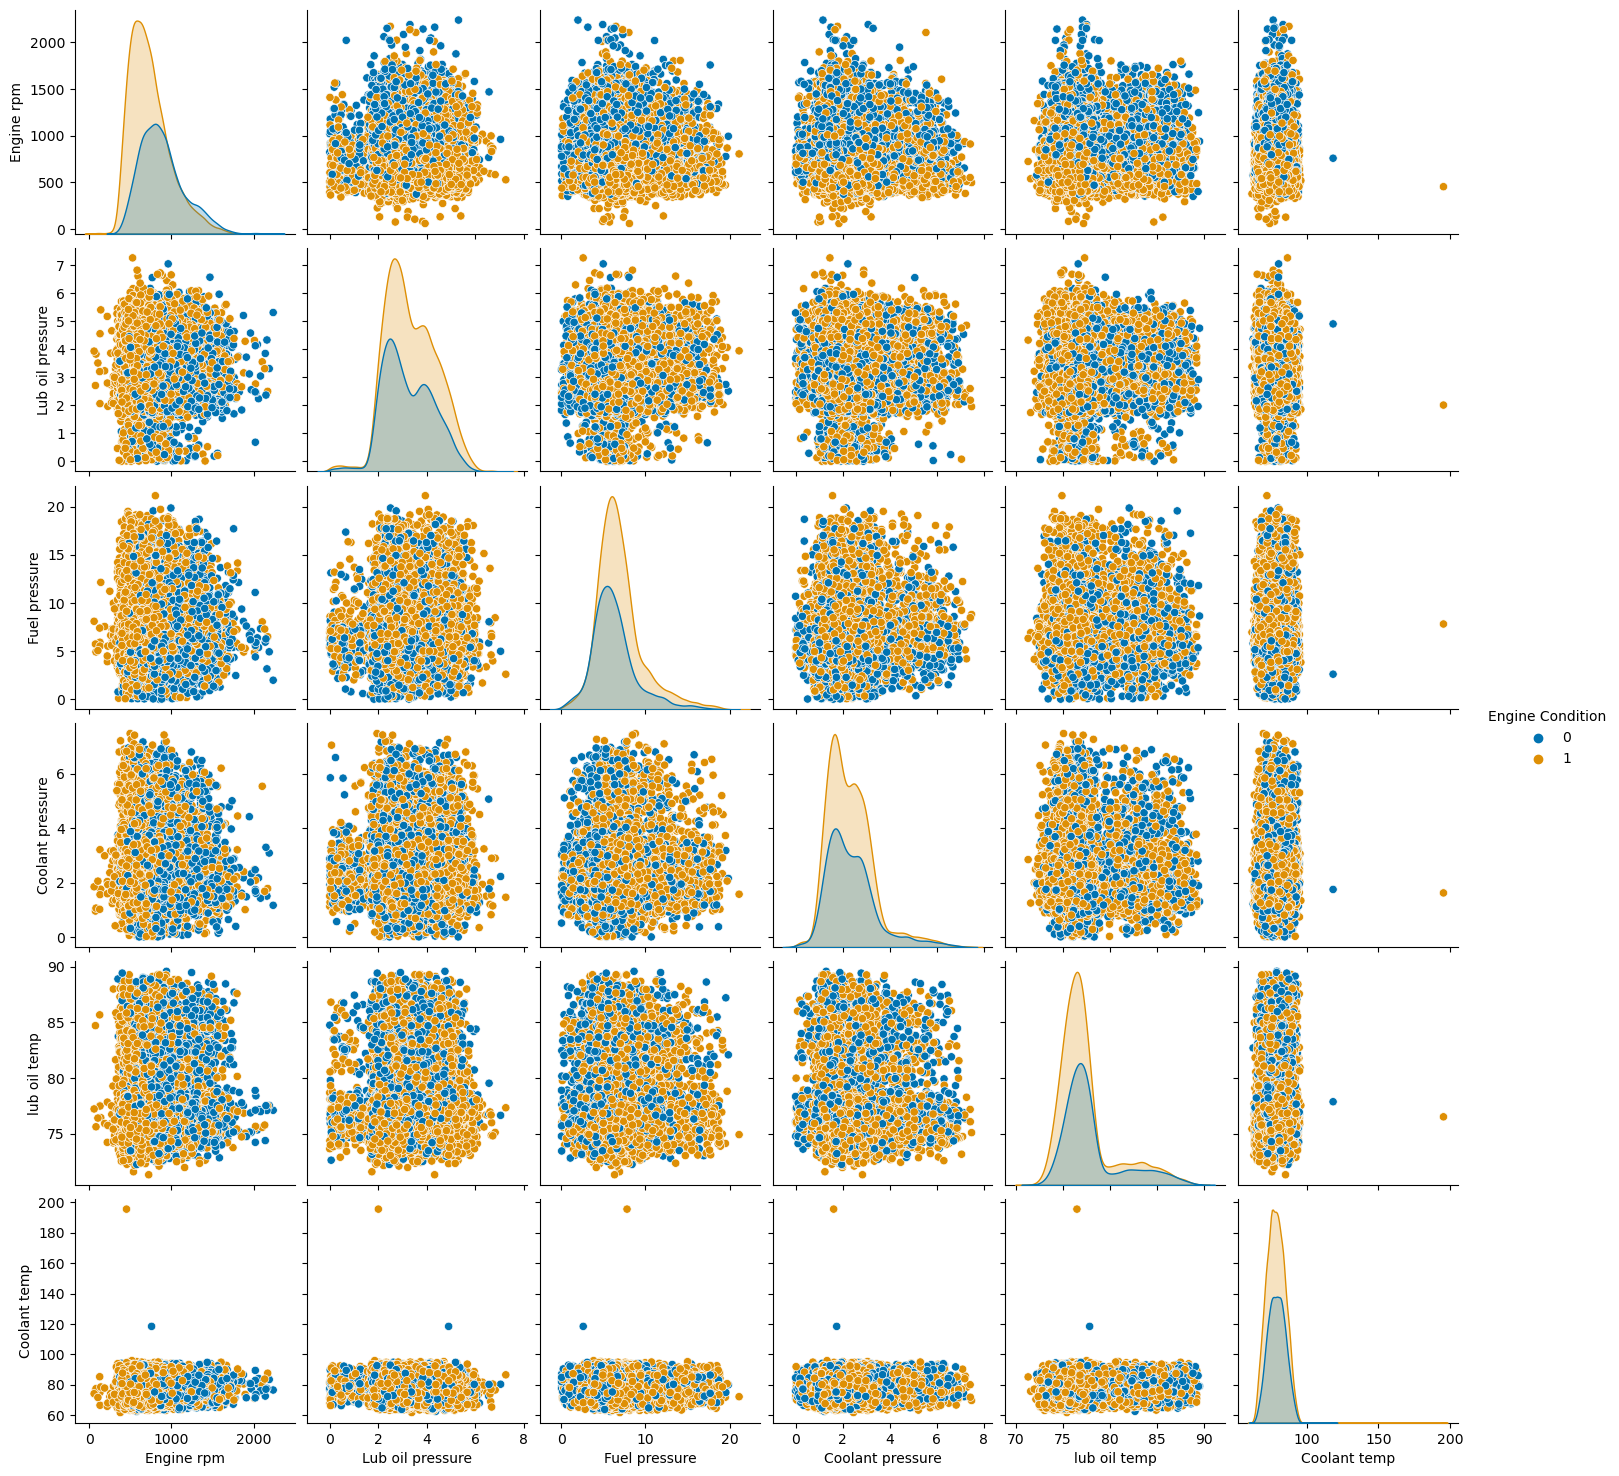

In [18]:
sns.pairplot(engine_df, hue="Engine Condition")

Anotations:
- Coolant temp might require some scaling

## Check Correlation

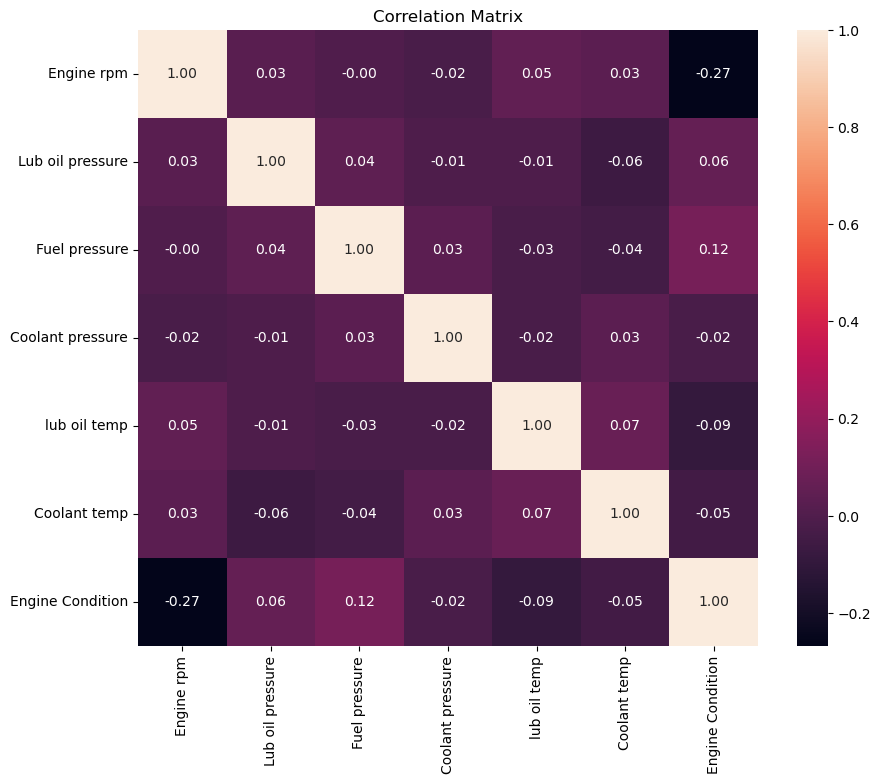

In [7]:
# Calculate the correlation matrix
corr = engine_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Anotations:
- Engine condition is negative correlated with Engine rpm
- Engine condition is somewhat correlated with Fuel preassure

/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


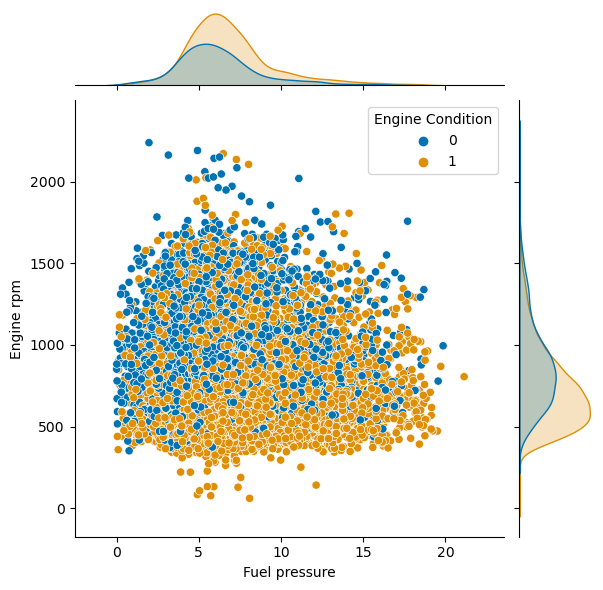

In [20]:
sns.jointplot(engine_df, x="Fuel pressure", y="Engine rpm", hue="Engine Condition")

/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/Caskroom/miniconda/base/envs/env-data-mentoring/lib/pyth

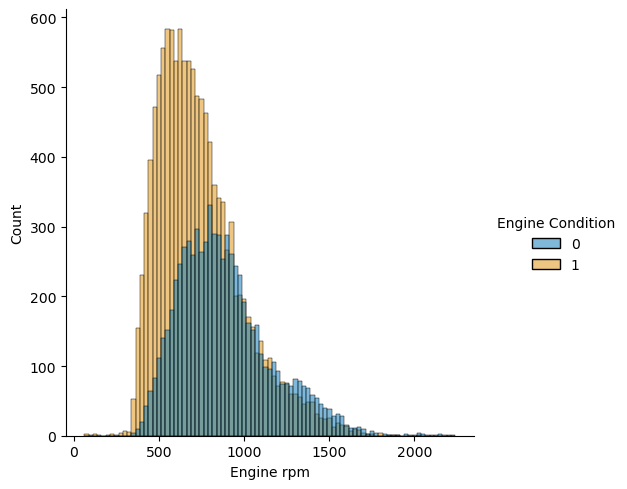

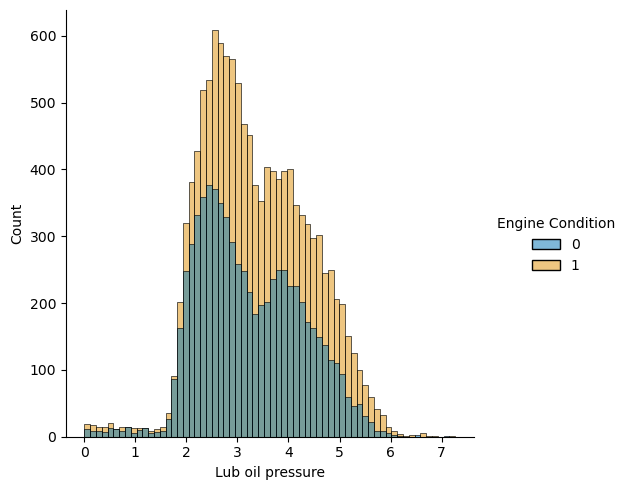

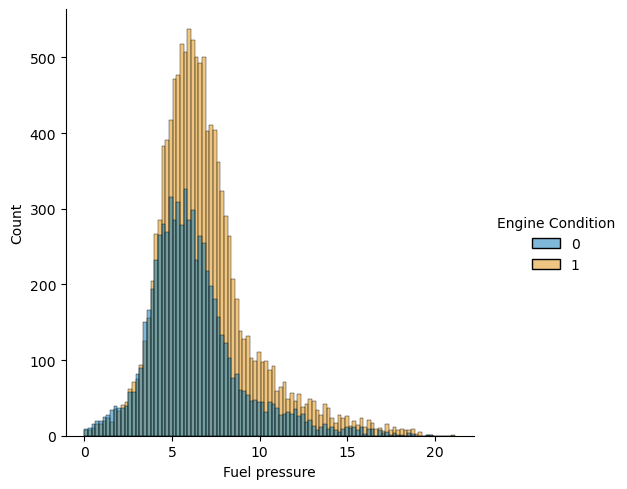

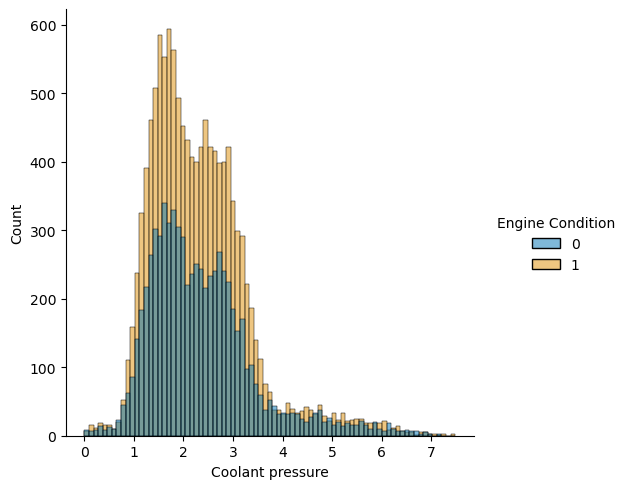

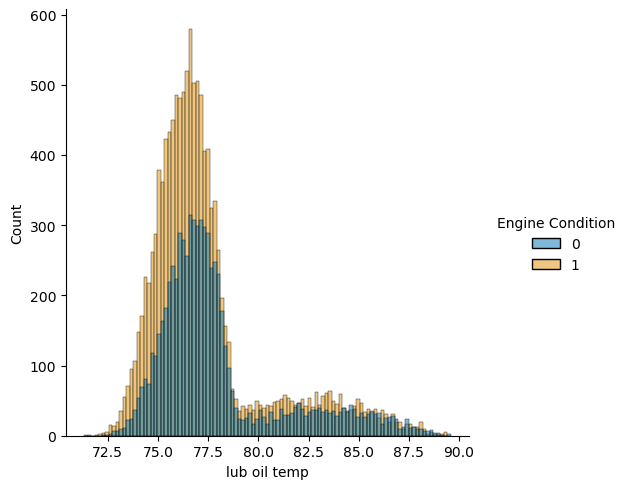

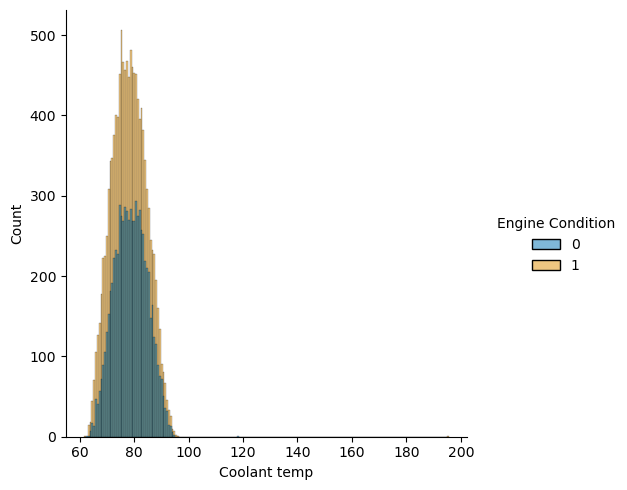

In [21]:
for feat in engine_df.columns:
    if feat != "Engine Condition":
        sns.displot(engine_df, x=feat, hue="Engine Condition")  

### Build Profile Report

In [11]:
# This will generate a profilling report. Execute this just one time. 
reports_path = "../reports/"
profile=ProfileReport(engine_df, title="Engine Data Profiling Report")
profile.to_file(reports_path+"profiling_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 15.69it/s]


## Feature engineering

In [22]:
# Coolant Efficiency
engine_df["Coolant Efficiency"] = (1 / engine_df["Engine rpm"]) * engine_df["Coolant temp"]

# Oil Efficiency
engine_df["Oil Efficiency"] = 1 / (engine_df["Engine rpm"] * engine_df["lub oil temp"])

engine_df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,Coolant Efficiency,Oil Efficiency
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,0.116617,0.000017
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,0.094116,0.000015
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,0.153165,0.000025
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,0.151743,0.000029
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,0.140550,0.000021


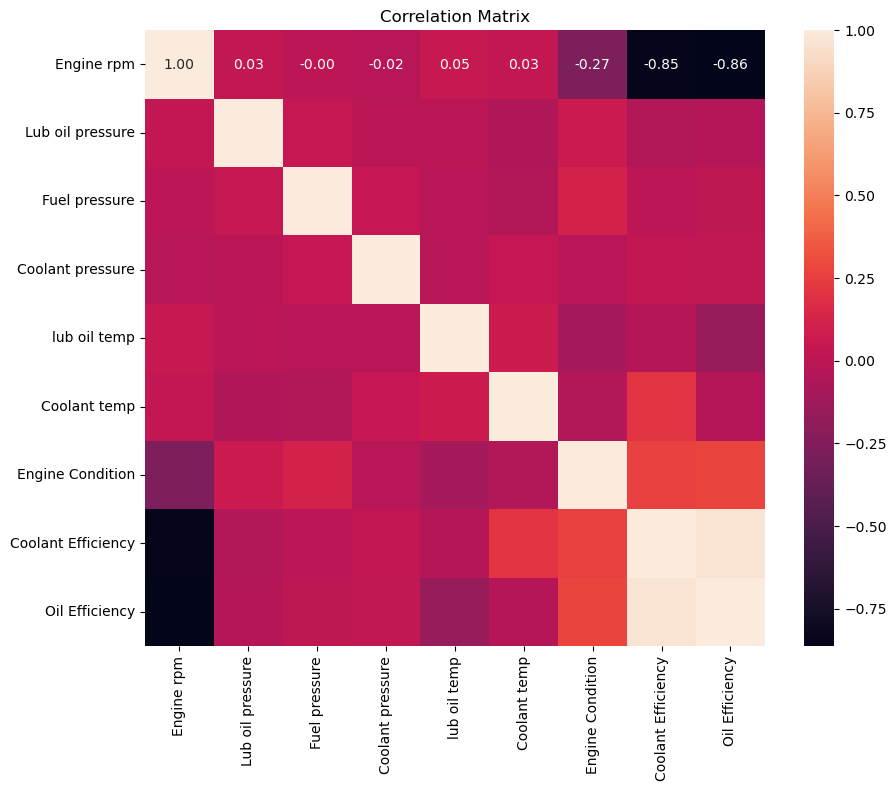

In [23]:
# Calculate the correlation matrix
corr = engine_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [24]:
engine_df.to_csv('./../data/interim/engine_data_w_efficiency.csv', index=False)

Anotations:
- Coolant efficiency and Oil Efficency have correlation with Engine RPM and therefore with the Engine condition

#### Importance of Engine Oil for Car Performance

Engine oil is a vital component of any car’s performance. Its primary role is to keep the engine lubricated, which reduces friction and prevents the engine components from rubbing against each other. The oil also helps to cool the engine by dissipating the heat that builds up during operation. Oil also acts as a cleaning agent, removing dirt and debris from the engine, preventing damage to engine components, and keeping your engine running efficiently.


Calculating oil efficiency using RPM (revolutions per minute) and oil temperature involves understanding how these factors affect the performance and efficiency of the engine's lubrication system. Here's a basic outline of the process:

### 1. Collect Data
- **RPM (Revolutions Per Minute):** Measure the engine's RPM using a tachometer.
- **Oil Temperature:** Measure the oil temperature using a suitable sensor or gauge.

### 2. Understand the Relationship
Oil efficiency can be influenced by several factors, including:
- **Viscosity of the Oil:** Viscosity changes with temperature. Higher temperatures typically reduce viscosity, making the oil thinner.
- **Friction:** Higher RPM can increase friction, which affects oil temperature and efficiency.
- **Lubrication Quality:** Oil must maintain a balance between being too thick (high viscosity at low temperatures) and too thin (low viscosity at high temperatures).

### 3. Use Relevant Formulas or Models
To compute oil efficiency, you might use empirical formulas or models that relate oil temperature and RPM to efficiency. This often requires engine-specific data or manufacturer-provided information.

#### Example Formula (Simplified):
One possible way to estimate oil efficiency is by considering the oil's viscosity index and the engine's operational parameters. An empirical approach could be:

\[ \text{Oil Efficiency} = \frac{1}{1 + \alpha \times (\text{RPM} - \text{Optimal RPM})^2 + \beta \times (\text{Oil Temperature} - \text{Optimal Oil Temperature})^2} \]

Where:
- \(\alpha\) and \(\beta\) are coefficients that describe how sensitive the efficiency is to changes in RPM and oil temperature.
- Optimal RPM and Optimal Oil Temperature are the conditions under which the engine operates most efficiently.

### 4. Gather Manufacturer Data
To apply the formula accurately, gather data from the engine or oil manufacturer regarding the optimal operating conditions and sensitivity coefficients.

### 5. Calculate Oil Efficiency
Plug the collected RPM and oil temperature values into the formula to estimate the oil efficiency.

### Example Calculation
Let's say:
- Optimal RPM = 3000
- Optimal Oil Temperature = 90°C
- \(\alpha = 0.00001\)
- \(\beta = 0.001\)
- Measured RPM = 3500
- Measured Oil Temperature = 100°C

\[ \text{Oil Efficiency} = \frac{1}{1 + 0.00001 \times (3500 - 3000)^2 + 0.001 \times (100 - 90)^2} \]

\[ \text{Oil Efficiency} = \frac{1}{1 + 0.00001 \times 500^2 + 0.001 \times 10^2} \]

\[ \text{Oil Efficiency} = \frac{1}{1 + 0.00001 \times 250000 + 0.001 \times 100} \]

\[ \text{Oil Efficiency} = \frac{1}{1 + 2.5 + 0.1} \]

\[ \text{Oil Efficiency} = \frac{1}{3.6} \approx 0.278 \]

### Conclusion
The oil efficiency in this example is approximately 0.278, indicating how close the oil's performance is to optimal conditions. 

### Considerations
- This is a simplified approach. Real-world calculations might require more sophisticated models considering additional factors like load, pressure, oil degradation, and specific engine characteristics.
- Regular monitoring and adjustments based on actual performance data can improve accuracy and reliability.

By using these steps and consulting with manufacturer data, you can estimate the oil efficiency based on RPM and oil temperature.

In [25]:
engine_X = engine_df.drop("Engine Condition", axis=1)
engine_Y = engine_df["Engine Condition"]

engine_X.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Coolant Efficiency,Oil Efficiency
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,0.116617,0.000017
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0.094116,0.000015
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,0.153165,0.000025
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,0.151743,0.000029
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0.140550,0.000021


In [26]:
rpm_idx, oil_pressure_idx, coolant_pressure_idx, oil_temp_idx, coolant_temp_idx = 0, 1, 3, 4, 5

class AttributesAdder(BaseEstimator, TransformerMixin):
    
    # Constructor of the Class
    def __init__(self, add_oil_system=True, add_coolant_system=True):
        self.add_oil_system = add_oil_system
        self.add_coolant_system = add_coolant_system
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        if self.add_oil_system:
            oil_efficiency = 1 / (X[:, rpm_idx] * X[:, oil_temp_idx])
            X = np.c_[X, oil_efficiency]
            
        if self.add_coolant_system:
            cool_efficiency = (1 / X[:, rpm_idx]) * X[:, coolant_temp_idx]
            X = np.c_[X, cool_efficiency]
            
        return X   

In [27]:
attr_addr = AttributesAdder()
engine_prep = attr_addr.transform(engine_X.values)
print(f"Transformed Data: {engine_prep[0, :]}")

Transformed Data: [7.00000000e+02 2.49359182e+00 1.17909274e+01 3.17898079e+00
 8.41441629e+01 8.16321865e+01 1.16617409e-01 1.69776652e-05
 1.69776652e-05 1.16617409e-01]


In [28]:
engine_prep_pipe = Pipeline([
    ("attr_adder", AttributesAdder()),
    ("std_scaler", StandardScaler())
])

engine_data_prepared = engine_prep_pipe.fit_transform(engine_X.values)
engine_data_prepared[0, :]

array([-0.34094836, -0.7930403 ,  1.85998007,  0.81401782,  2.08966341,
        0.51634686,  0.15814015, -0.18711723, -0.18711723,  0.15814015])

In [29]:
engine_data_prepared.shape

(19535, 10)

In [30]:
engine_df.shape

(19535, 9)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(engine_data_prepared, engine_Y, test_size=0.1, random_state=RANDOM_STATE)
print(f"Shape X Train: {X_train.shape}")
print(f"Shape y Train: {y_train.shape}\n")
print(f"Shape X Test: {X_test.shape}")
print(f"Shape y Test: {y_test.shape}\n")

Shape X Train: (17581, 10)
Shape y Train: (17581,)

Shape X Test: (1954, 10)
Shape y Test: (1954,)



In [32]:
# Initilisation
tree_cls = DecisionTreeClassifier()

# Training
tree_cls.fit(X_train, y_train)

validation = tree_cls.predict(X_test)
score = sum(validation == y_test)
print(f"Score: {score / len(y_test)}")

Score: 0.5762538382804504
